In [1]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from commons import DATASET_LOCATION

In [2]:
df = pd.read_csv(DATASET_LOCATION)

In [3]:
print(df.shape)
print(df.columns)
print(df["Language"].unique())

(10337, 2)
Index(['Text', 'Language'], dtype='object')
['English' 'Malayalam' 'Hindi' 'Tamil' 'Portugeese' 'French' 'Dutch'
 'Spanish' 'Greek' 'Russian' 'Danish' 'Italian' 'Turkish' 'Sweedish'
 'Arabic' 'German' 'Kannada']


In [4]:
df_iteng = df[(df["Language"] == "Italian") | (df["Language"] == "English")].copy()

In [5]:
print(df_iteng.shape)
df_iteng.info()
df_iteng.isna().sum()

(2083, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 2083 entries, 0 to 7811
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      2083 non-null   object
 1   Language  2083 non-null   object
dtypes: object(2)
memory usage: 48.8+ KB


Text        0
Language    0
dtype: int64

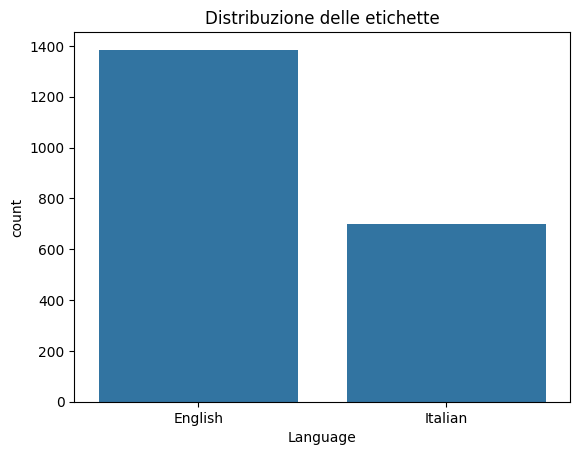

Language
English    0.664906
Italian    0.335094
Name: proportion, dtype: float64


In [6]:
sns.countplot(x="Language", data=df_iteng)
plt.title("Distribuzione delle etichette")
plt.show()

print(df_iteng["Language"].value_counts(normalize=True))

In [7]:
df_iteng["text_length"] = df_iteng["Text"].apply(len)
df_iteng["word_count"] = df_iteng["Text"].apply(lambda x: len(str(x).split()))

df_iteng[["text_length", "word_count"]].describe()

,text_length,word_count
count,2083.000000,2083.000000
mean,138.662506,22.010082
std,95.994266,15.032894
min,4.000000,1.000000
25%,75.000000,12.000000
50%,124.000000,20.000000
75%,185.000000,29.000000
max,1007.000000,144.000000


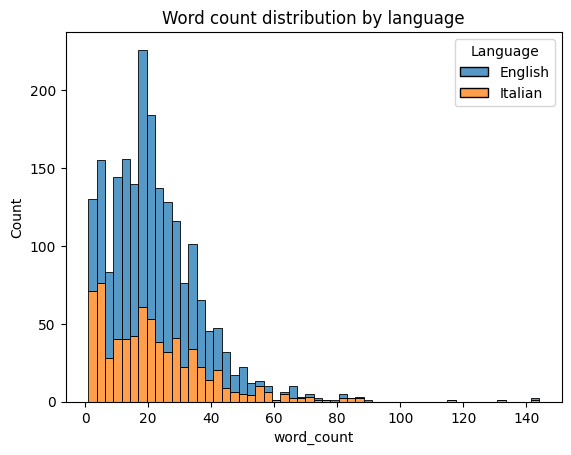

In [8]:
#Importante per verificare che dimensioni hanno le frasi. Per dimensioni ridotte non conviene eliminare in ogni caso le stopwords
sns.histplot(data=df_iteng, x="word_count", bins="auto", hue="Language", multiple="stack")
plt.title("Word count distribution by language")
plt.show()

In [9]:
# osserviamo la presenza di stopwords tra le parole più frequenti. Non conviene eliminarle probabilmente


def get_top_words(df: pd.DataFrame, language: str, n: int=10) -> list[tuple[str, int]]:
    """
    Return the top N most frequent words in a dataset for a specified language.

    This function filters the DataFrame by the given language, tokenizes the text
    data by splitting on spaces (after lowercasing), and returns the `n` most
    common words along with their frequencies.

    Args:
        df (pd.DataFrame): The input DataFrame containing at least 'Language' and 'Text' columns.
        language (str): The language to filter the DataFrame by.
        n (int, optional): The number of top words to return. Defaults to 10.

    Returns:
        list[tuple[str, int]]: A list of tuples containing the most frequent words and their counts.

    """
    texts: pd.Series = df[df["Language"] == language]["Text"]
    words: list[str] = " ".join(texts).lower().split()
    return Counter(words).most_common(n)


print(f"Top italian words: {get_top_words(df_iteng, 'Italian')}")
print(f"Top wnglish words: {get_top_words(df_iteng, 'English')}")

Top italian words: [('di', 676), ('e', 369), ('che', 324), ('in', 278), ('è', 252), ('la', 241), ('un', 228), ('il', 225), ('a', 196), ('non', 186)]
Top wnglish words: [('the', 1545), ('of', 1025), ('and', 826), ('to', 740), ('a', 725), ('in', 672), ('is', 401), ('that', 372), ('you', 302), ('as', 272)]
